In [5]:
#İmport libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
from datetime import time, timedelta 

In [6]:
#Reading the data from Excel file
data=pd.read_excel("scada_arıza_verisi.xlsx")

In [7]:
#Similar datas changed with unique representation and row with nan values is eliminated
data_prepared=data.dropna()
data_prepared.head()

,No,Gün,Ay,Yıl,Hafta,Saat,Bölge,İlçe,Arıza Bildirimi,İstasyon,HücreNo,Fider,FiderinAçmaNedeni,L1,L2,L3,TOPRAK,Fiderin \nKapanma Zamanı,Fiderin Açık Kalma Süresi,Dakika
1,1.0,20.0,Nisan,2020.0,Pazartesi,09:27:00,MANİSA,YUNUSEMRE,SCADA,MURADIYE DM,M13,M13 Tekel,TOPRAK,3600.0,3440.0,2.0,390,10:17:00,00:50:00,50.0
2,2.0,20.0,Nisan,2020.0,Pazartesi,10:05:00,GÜNEY,ÇEŞME,SCADA,ALACATI IM,L04,Ilıca-2,TOPRAK,100.0,50.0,50.0,45,10:26:00,00:21:00,21.0
4,4.0,21.0,Nisan,2020.0,Salı,09:35:00,MANİSA,YUNUSEMRE,SCADA,MURADİYE DM-5.11,M13,Akarlar,AŞIRI AKIM,10.0,1520.0,5.0,490,10:19:00,00:44:00,44.0
8,8.0,23.0,Nisan,2020.0,Perşembe,16:14:00,MANİSA,DEMIRCI,SCADA,ÇATALOLUK DM,M09,Köprübaşı Çıkış,TOPRAK,370.0,45.0,65.0,365,16:23:00,00:09:00,9.0
9,9.0,23.0,Nisan,2020.0,Perşembe,18:16:00,MANİSA,YUNUSEMRE,SCADA,MURADIYE DM,M12,M12 Orman Fidanlığı,TOPRAK,570.0,5.0,5.0,575,18:48:00,00:32:00,32.0


In [8]:
#İgnore file warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [9]:
#Adding a new feature which shows the seasons of the year with respect to datas
season_dict = {'Ocak': 'Kış',
               'Şubat': 'Kış',
               'Mart': 'İlkbahar', 
               'Nisan': 'İlkbahar',
               'Mayıs': 'İlkbahar',
               'Haziran': 'Yaz',
               'Temmuz': 'Yaz',
               'Ağustos': 'Yaz',
               'Eylül': 'Sonbahar',
               'Ekim': 'Sonbahar',
               'Kasım': 'Sonbahar',
               'Aralık': 'Kış'}
data_prepared['Mevsim']=data_prepared['Ay'].apply(lambda x: season_dict[x])
data_prepared.head()

,No,Gün,Ay,Yıl,Hafta,Saat,Bölge,İlçe,Arıza Bildirimi,İstasyon,...,Fider,FiderinAçmaNedeni,L1,L2,L3,TOPRAK,Fiderin \nKapanma Zamanı,Fiderin Açık Kalma Süresi,Dakika,Mevsim
1,1.0,20.0,Nisan,2020.0,Pazartesi,09:27:00,MANİSA,YUNUSEMRE,SCADA,MURADIYE DM,...,M13 Tekel,TOPRAK,3600.0,3440.0,2.0,390,10:17:00,00:50:00,50.0,İlkbahar
2,2.0,20.0,Nisan,2020.0,Pazartesi,10:05:00,GÜNEY,ÇEŞME,SCADA,ALACATI IM,...,Ilıca-2,TOPRAK,100.0,50.0,50.0,45,10:26:00,00:21:00,21.0,İlkbahar
4,4.0,21.0,Nisan,2020.0,Salı,09:35:00,MANİSA,YUNUSEMRE,SCADA,MURADİYE DM-5.11,...,Akarlar,AŞIRI AKIM,10.0,1520.0,5.0,490,10:19:00,00:44:00,44.0,İlkbahar
8,8.0,23.0,Nisan,2020.0,Perşembe,16:14:00,MANİSA,DEMIRCI,SCADA,ÇATALOLUK DM,...,Köprübaşı Çıkış,TOPRAK,370.0,45.0,65.0,365,16:23:00,00:09:00,9.0,İlkbahar
9,9.0,23.0,Nisan,2020.0,Perşembe,18:16:00,MANİSA,YUNUSEMRE,SCADA,MURADIYE DM,...,M12 Orman Fidanlığı,TOPRAK,570.0,5.0,5.0,575,18:48:00,00:32:00,32.0,İlkbahar


In [10]:
#The number of repetitions of categorical datas
categorical = ("Ay","Hafta","Bölge","İlçe","İstasyon","HücreNo","Fider","FiderinAçmaNedeni","Mevsim")
for k in categorical:
    print("For ",k, "=","\n",data_prepared[k].value_counts(),"\n")

For  Ay = 
 Ağustos    237
Mayıs      145
Haziran    140
Eylül      103
Ocak        75
Temmuz      58
Kasım       49
Ekim        49
Nisan       43
Mart        34
Şubat       30
Aralık      19
Name: Ay, dtype: int64 

For  Hafta = 
 Salı         170
Çarşamba     153
Pazar        146
Cumartesi    133
Cuma         129
Pazartesi    126
Perşembe     125
Name: Hafta, dtype: int64 

For  Bölge = 
 MANİSA      509
GÜNEY       342
KUZEY        91
METROPOL     35
İZMİR         2
Manisa        1
izmir         1
manisa        1
Name: Bölge, dtype: int64 

For  İlçe = 
 YUNUSEMRE      219
KULA            97
TIRE            65
KARABURUN       44
TORBALI         43
BAYINDIR        41
TURGUTLU        39
ÖDEMIŞ          38
SARIGÖL         34
BERGAMA         34
AKHISAR         29
MENDERES        29
GÖRDES          23
ALAŞEHIR        22
SELÇUK          20
MENEMEN         19
ALIAĞA          19
ÇEŞME           18
SOMA            17
DIKILI          17
KEMALPAŞA       15
URLA            14
GAZİEMİR        13

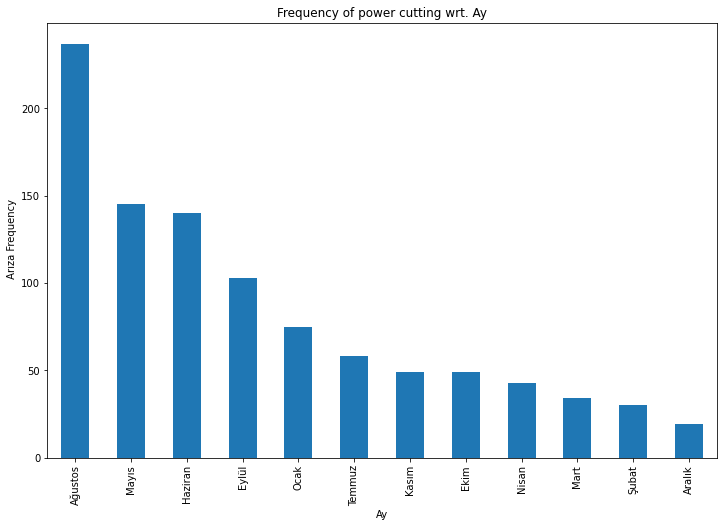

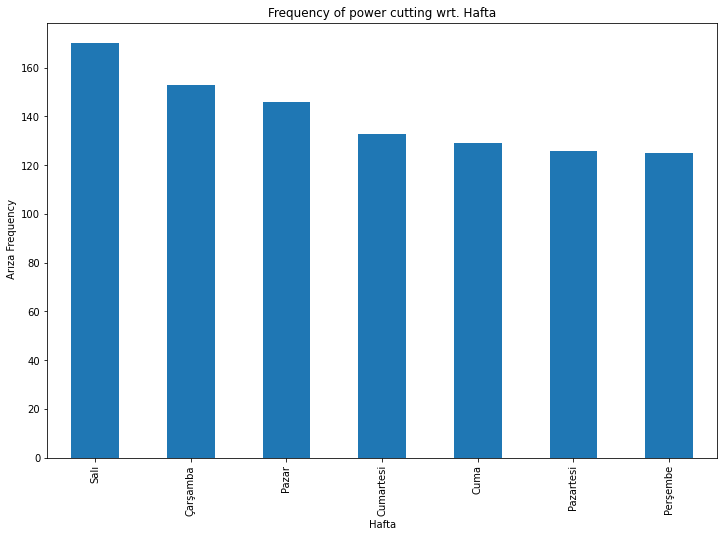

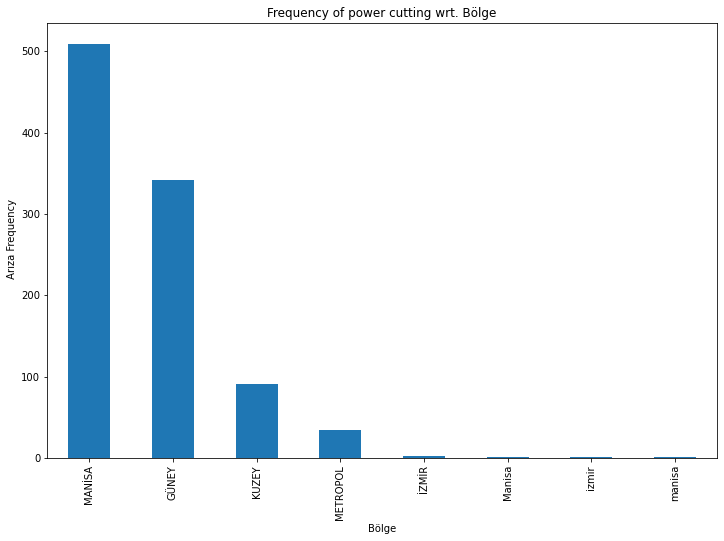

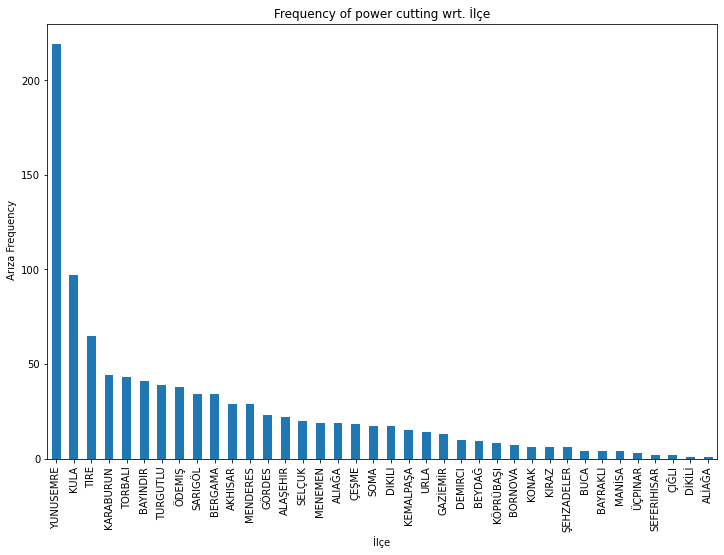

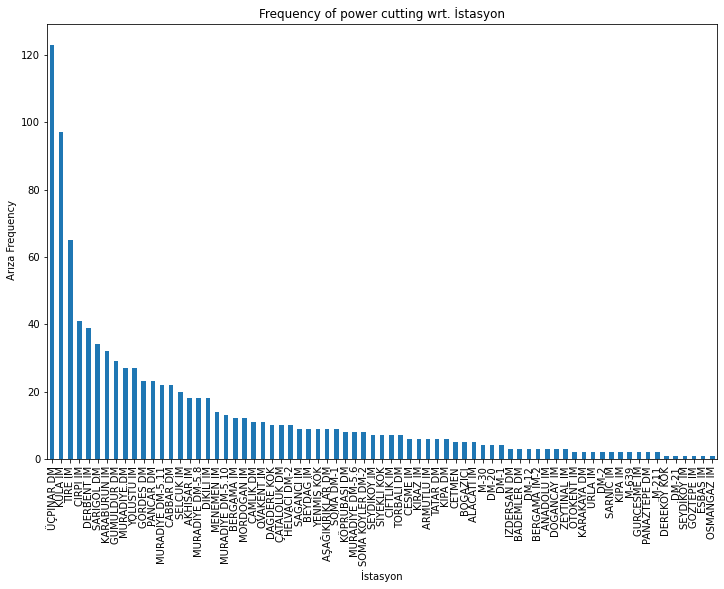

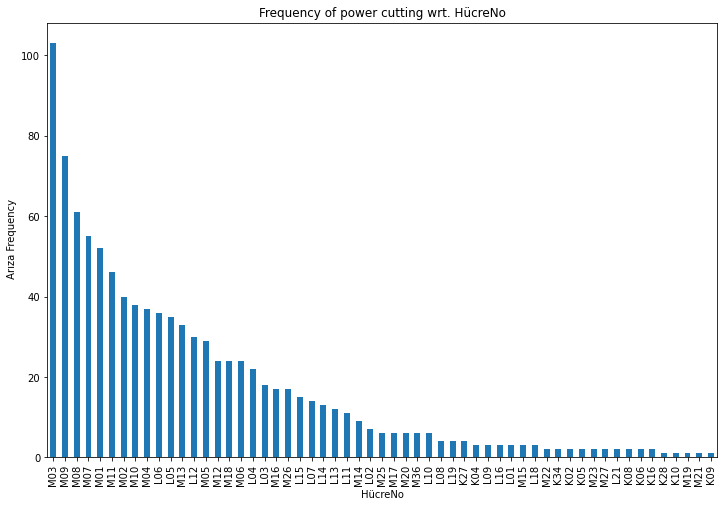

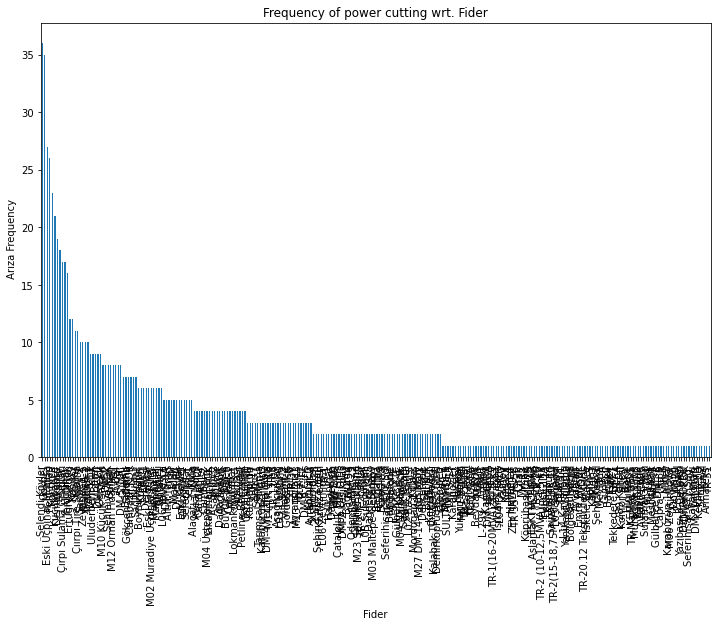

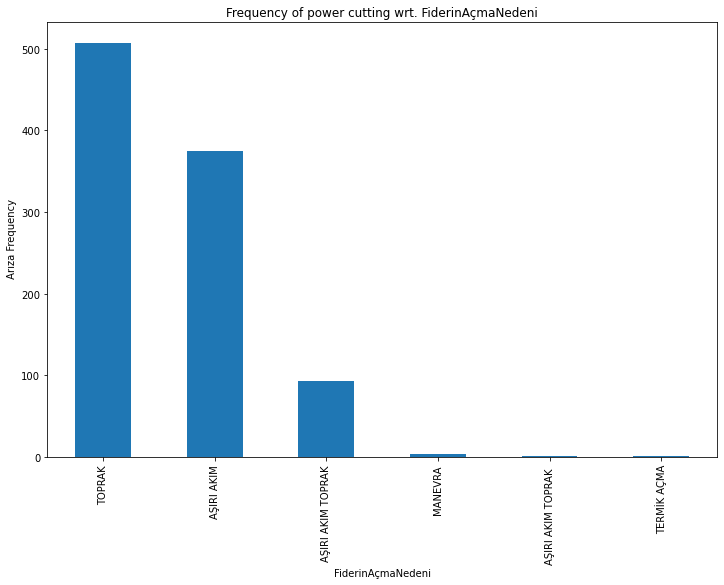

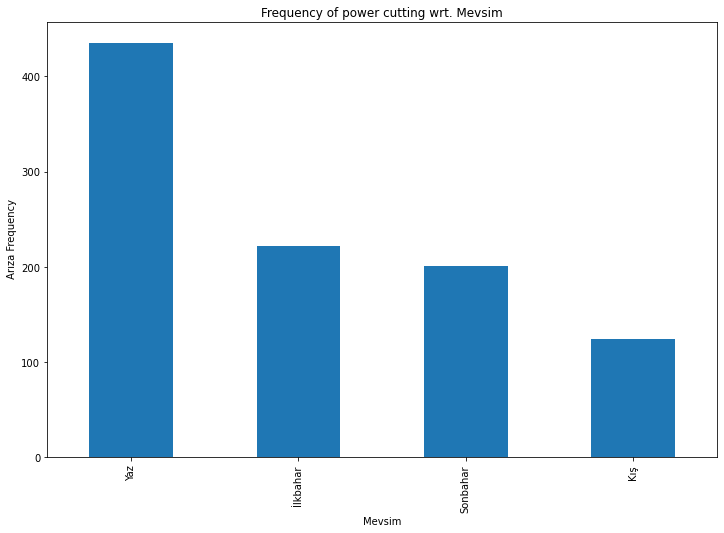

In [11]:
#Bar plot of the categorical variable with frequency
for k in categorical:
    plt.figure(figsize=(12, 8))
    data_prepared[k].value_counts().plot(kind='bar', color='red')
    plt.xlabel(k)
    plt.ylabel(" Arıza Frequency")
    plt.title("Frequency of power cutting wrt. %s" % (k))

In [12]:
#Convert the object data type to numeric data
data_prepared['L1'] = pd.to_numeric(data_prepared['L1'], errors='coerce')
data_prepared['L2'] = pd.to_numeric(data_prepared['L2'], errors='coerce')
data_prepared['L3'] = pd.to_numeric(data_prepared['L3'], errors='coerce')
data_prepared['TOPRAK'] = pd.to_numeric(data_prepared['TOPRAK'], errors='coerce')

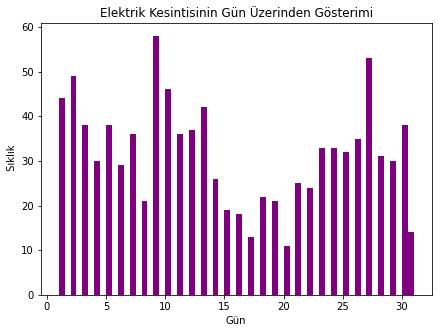

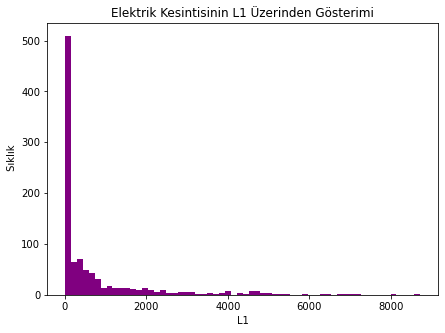

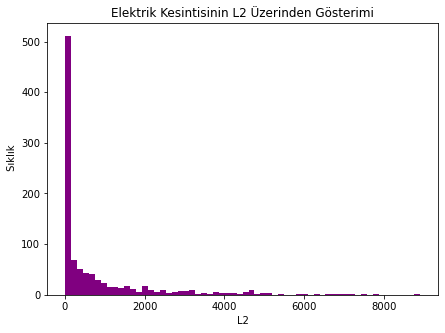

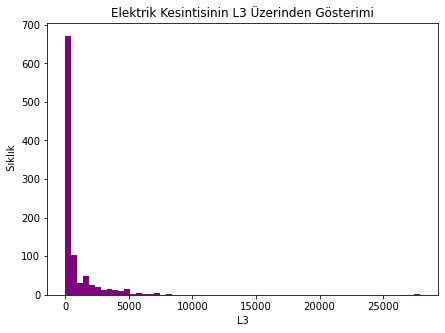

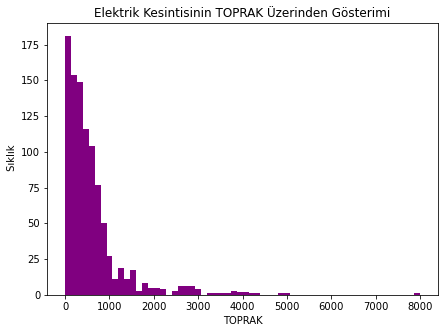

In [13]:
#The power cut frequency with respect to current value and day
variables= ("Gün","L1","L2","L3","TOPRAK")
for k in variables:
    plt.figure(figsize=(7, 5))
    plt.hist(data_prepared[k], bins = 60 , color="purple")
    plt.xlabel(k)
    plt.ylabel(" Sıklık")
    plt.title("Elektrik Kesintisinin %s Üzerinden Gösterimi" % (k))

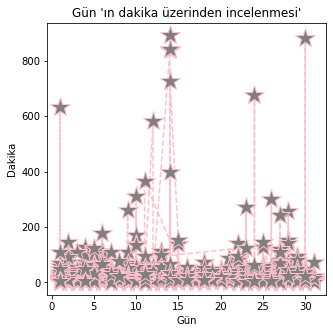

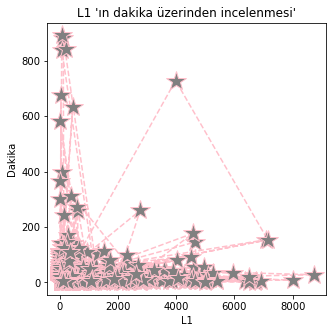

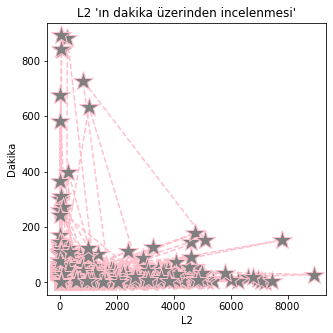

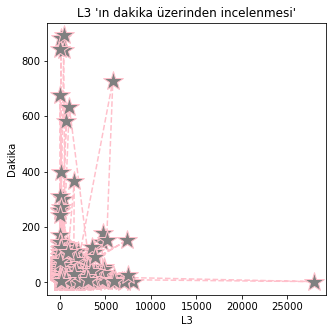

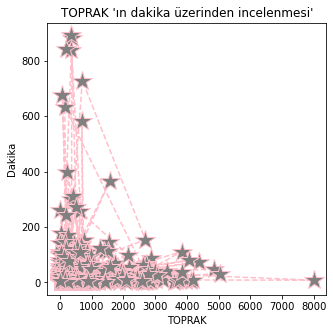

In [14]:
# SCATTER PLOT
for k in variables:
    #width = 20
    #height = 10
    plt.figure(figsize=(5, 5))
    y=data_prepared["Dakika"]
    x=data_prepared[k]
    plt.plot(x,y, color="pink", linestyle="--", marker="*", markersize=20, markerfacecolor="grey")
    plt.xlabel(k)
    plt.ylabel("Dakika")
    plt.title("%s 'ın dakika üzerinden incelenmesi'"%k)

In [15]:
#Correlation between features
data_prepared.corr()

,No,Gün,Yıl,L1,L2,L3,TOPRAK,Dakika
No,1.000000,-0.019983,0.632902,0.051191,0.029520,0.049935,0.031394,-0.000576
Gün,-0.019983,1.000000,-0.024847,-0.044265,-0.058934,-0.072373,0.041474,0.013805
Yıl,0.632902,-0.024847,1.000000,0.064490,0.069895,0.058842,0.040169,0.007122
L1,0.051191,-0.044265,0.064490,1.000000,0.635569,0.485597,0.106232,0.010098
L2,0.029520,-0.058934,0.069895,0.635569,1.000000,0.508811,0.156771,-0.026413
L3,0.049935,-0.072373,0.058842,0.485597,0.508811,1.000000,0.191179,0.022499
TOPRAK,0.031394,0.041474,0.040169,0.106232,0.156771,0.191179,1.000000,0.001140
Dakika,-0.000576,0.013805,0.007122,0.010098,-0.026413,0.022499,0.001140,1.000000


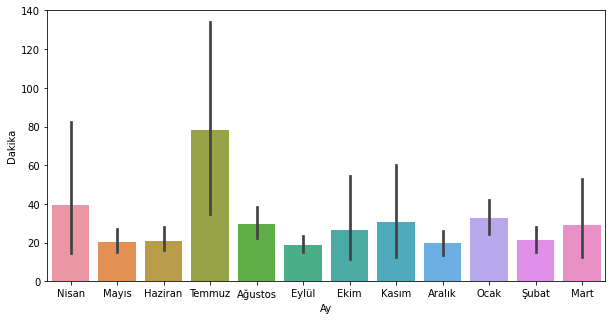

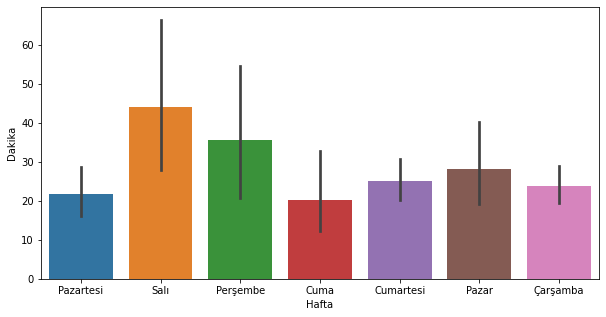

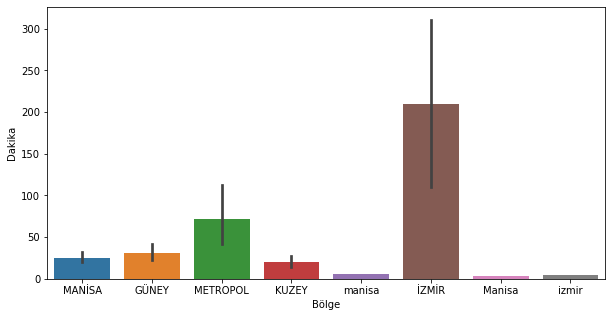

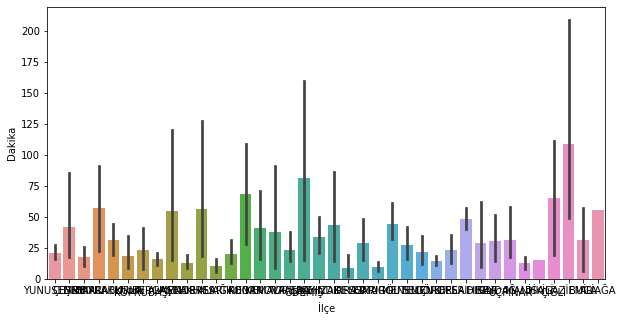

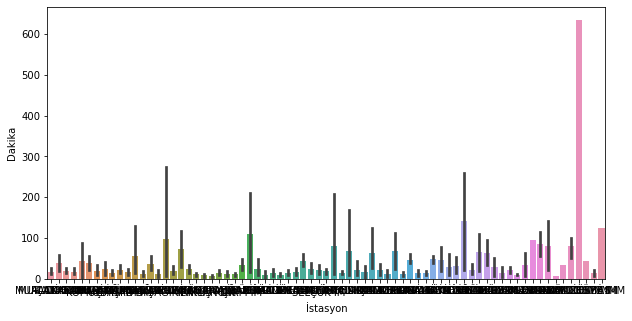

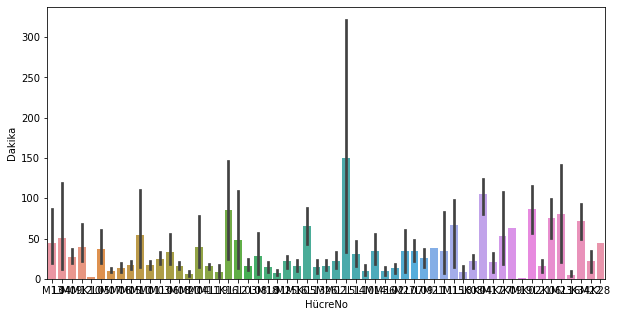

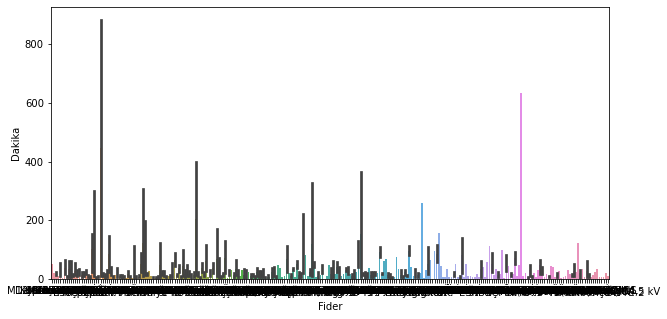

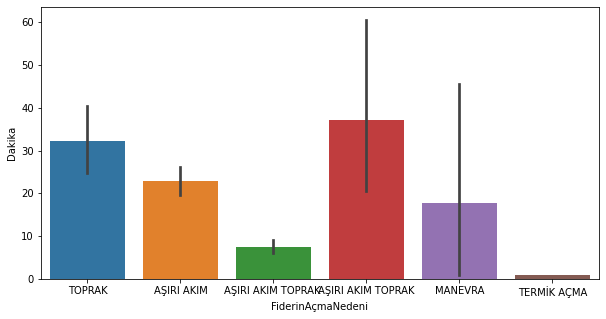

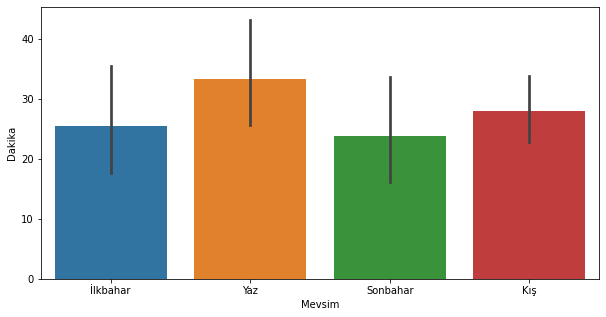

In [17]:
#Evaluation of relations of categorical data and minute 
for k in categorical:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=k,y="Dakika", data=data_prepared )
    plt.xlabel(k)
    plt.ylabel("Dakika")